In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

[[1.12079689 0.        ]
 [1.2700248  0.039942  ]
 [1.4287779  0.118034  ]
 [1.587531   0.19213   ]
 [1.9050372  0.283433  ]
 [2.2225434  0.311389  ]]


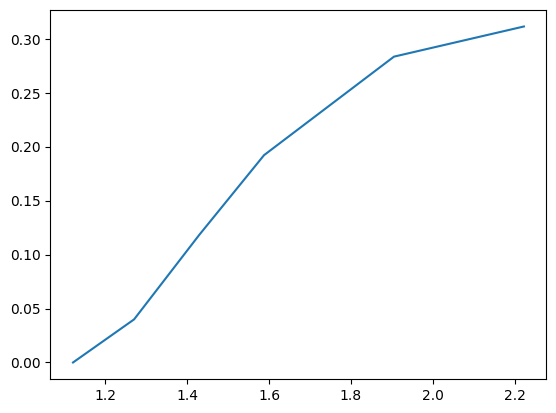

In [2]:
chan_results = np.array([
    [2.118, -108.949378-0.328961],
    [2.400, -108.866811-0.371586],
    [2.7, -108.7374000-0.422905],
    [3.0, -108.606226-0.479983],
    [3.6, -108.384757-0.610149],
    [4.2, -108.222899-0.744051],
])
chan_results[:, 0] *= 0.529177
chan_results[:, 1] -= np.min(chan_results[:, 1])
plt.plot(chan_results[:, 0], chan_results[:, 1])
print(chan_results)

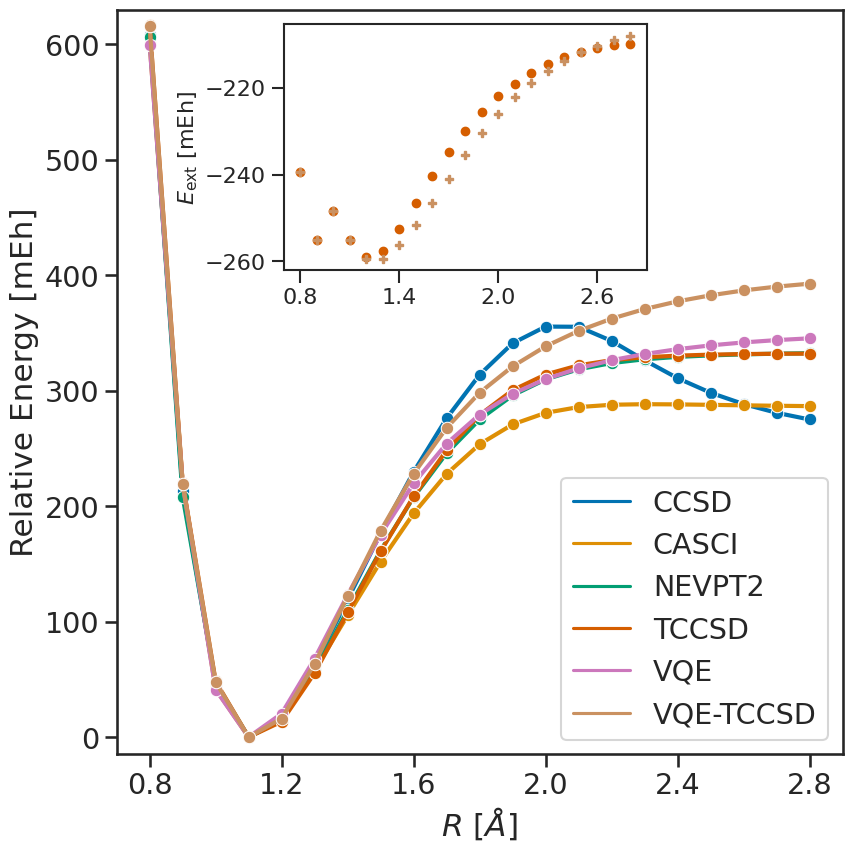

In [3]:
pal = "colorblind"
sns.set_theme(context="talk", style="ticks", font_scale=1.25, palette=pal)

# df = pd.read_hdf("n2_dissociation_fqe.h5", key="df")
# df = pd.melt(df, id_vars=['d'], value_vars=['FQE', 'FQE-TCCSD'], var_name='method', value_name='energy')

# df1 = pd.read_hdf("n2_dissociation_ccsd.h5", key="df")
df2 = pd.read_hdf("n2_dissociation_tcc.h5", key="df")
df_vqe = pd.read_hdf("n2_dissociation_vqe.h5", key="df")

df = df2.merge(df_vqe)
dfo = df.copy()

# display(df)

hue_order = ["CCSD", "CASCI", "NEVPT2", "TCCSD", "VQE", "VQE-TCCSD"]
dfm = pd.melt(
    df, id_vars=["d"], value_vars=hue_order,
    value_name="Energy", var_name="Method"
)
df = dfm

df['Energy'] = df.groupby(['Method'])['Energy'].transform(lambda x: np.array(x) - np.array(x).min())
df['Energy'] = np.array(df.Energy.values, dtype=float)
df.Energy *= 1000

inset = True
if inset:
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(9, 9)
else:
    fig, (ax, axin) = plt.subplots(1, 2)
    fig.set_size_inches(20, 9)

# ax.axhline(y=chan_results[-1,1] * 1000, color='gray', linestyle="--", label="FCI")
sns.lineplot(
    data=df, x="d", y="Energy", hue="Method",
    # style="Method",
    ax=ax,
    hue_order=hue_order,
    markers=True,
    linewidth=3.0,
    marker="o",
    # linestyle="-."
    # dashes=(2, 2),
)
# ax.plot(chan_results[:, 0], chan_results[:, 1] * 1000, "X", color='black', label="FCI")


# plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))


dfo['e_ext_exact'] = dfo.tcc_e_corr_exact - dfo.tcc_e_cas_exact
dfo['e_ext'] = dfo.tcc_e_corr - dfo.tcc_e_cas
dfo['e_corr_ccsd'] = dfo.CCSD - dfo.HF

dfo['e_ext_error'] = np.abs(dfo.e_ext_exact - dfo.e_ext)

dfo['pt2'] = dfo.NEVPT2 - dfo.CASCI

dfm = pd.melt(
    dfo, id_vars=["d"], value_vars=[
        # "tcc_e_corr_exact", "tcc_e_corr",
        'e_ext_exact', 'e_ext', 'e_corr_ccsd'
        # 'pt2'
    ],
    value_name="ext_corr", var_name="Method"
)
dfm['ext_corr'] *= 1000
# dfm['ext_corr'] = dfm.groupby(['Method'])['ext_corr'].transform(lambda x: np.array(x) - np.array(x).min())

if inset:
    axin = ax.inset_axes(bounds=[0.23, 0.65, 0.5, 0.33])

mksz = 6
axin.plot(dfo.d, dfo.e_ext_exact * 1000, "o", color=sns.color_palette(pal)[3], markersize=mksz)
axin.plot(dfo.d, dfo.e_ext * 1000, "P", color=sns.color_palette(pal)[5], markersize=mksz)
# axin.plot(dfo.d, dfo.e_ext_exact * 1000, "P", color=sns.color_palette("colorblind")[3], markersize=mksz)
# axin.plot(dfo.d, dfo.e_ext * 1000, marker=(4, 1, 0), linestyle="None", color=sns.color_palette("colorblind")[5], markersize=mksz)

if inset:
    fsz = 16
    axin.set_ylabel(r"$E_\mathrm{ext}$ [mEh]", fontsize=fsz)
    axin.set_xticks(np.arange(0.8, 2.9, 0.6))
    axin.tick_params(labelsize=fsz)
    lw = 1.5
    plt.setp(list(axin.spines.values()), linewidth=lw)
    axin.xaxis.set_tick_params(width=lw)
    axin.yaxis.set_tick_params(width=lw)
else:
    axin.set_ylabel(r"$E_\mathrm{ext}$ [mEh]")
    axin.set_xticks(np.arange(0.8, 2.9, 0.4))
    axin.set_xlabel(r"$R$ [$\AA$]")

sns.move_legend(
    ax,
    loc="lower right",
    # labels=['TCCSD', 'TCCSD-VQE', 'PT2'],
    # handles=handles,
    title=None,
)



ax.set_ylim(-15, 630)
ax.set_ylabel("Relative Energy [mEh]")
ax.set_xlabel(r"$R$ [$\AA$]")
ax.set_xticks(np.arange(0.8, 2.9, 0.4))
# ax.tick_params(which='both', direction='in')
plt.tight_layout()
plt.savefig("n2_dissociation.png", dpi=300)
plt.savefig("n2_dissociation.pdf", dpi=300)

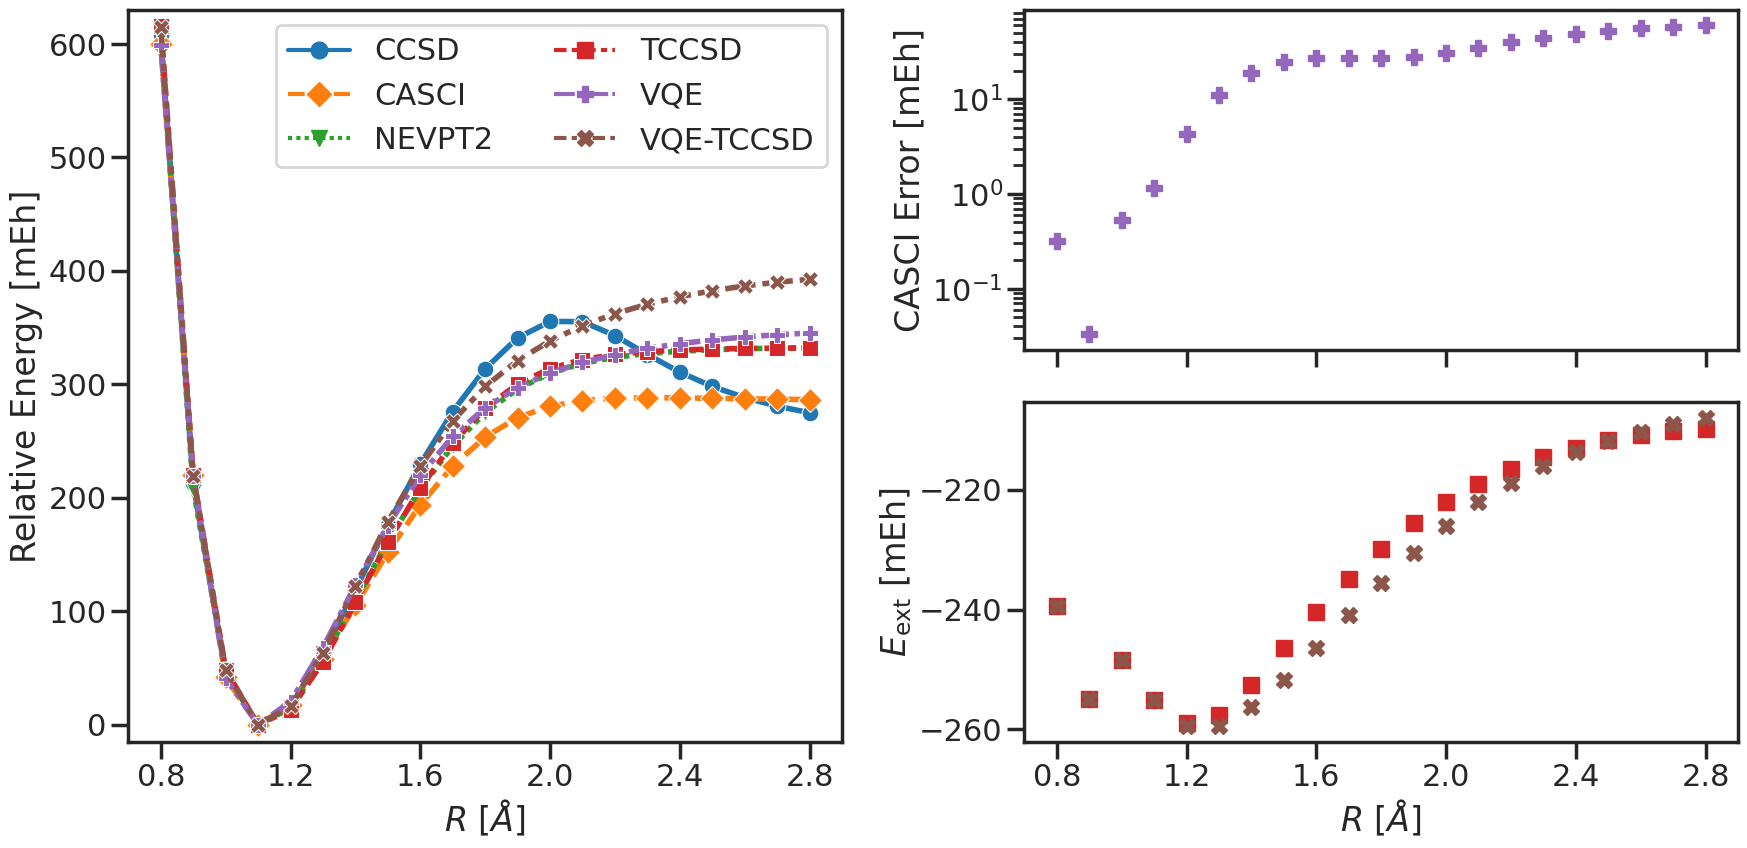

In [4]:
pal = "tab10"
# pal = "colorblind"
# sns.set_theme(context="talk", style="ticks", font_scale=1.35, palette=pal)
sns.set_theme(context="poster", style="ticks", font_scale=1.0, palette=pal)

# df = pd.read_hdf("n2_dissociation_fqe.h5", key="df")
# df = pd.melt(df, id_vars=['d'], value_vars=['FQE', 'FQE-TCCSD'], var_name='method', value_name='energy')

# df1 = pd.read_hdf("n2_dissociation_ccsd.h5", key="df")
df2 = pd.read_hdf("n2_dissociation_tcc.h5", key="df")
df_vqe = pd.read_hdf("n2_dissociation_vqe.h5", key="df")

df = df2.merge(df_vqe)
dfo = df.copy()

# display(df)

hue_order = ["CCSD", "CASCI", "NEVPT2", "TCCSD", "VQE", "VQE-TCCSD"]
dfm = pd.melt(
    df, id_vars=["d"], value_vars=hue_order,
    value_name="Energy", var_name="Method"
)
df = dfm

df['Energy'] = df.groupby(['Method'])['Energy'].transform(lambda x: np.array(x) - np.array(x).min())
df['Energy'] = np.array(df.Energy.values, dtype=float)
df.Energy *= 1000

fig, axd = plt.subplot_mosaic([['left', 'ur'], ['left', 'lr']], figsize=(18, 9), sharex=True)
# fig, axd = plt.subplot_mosaic([['left', 'ur'], ['left', 'lr']], figsize=(9 * 1.5, 4.5 * 1.5), sharex=True)

ax = axd['left']
axin = axd['lr']
ax1 = axd['ur']

# ax.axhline(y=chan_results[-1,1] * 1000, color='gray', linestyle="--", label="FCI")

mksz = 12
sns.lineplot(
    data=df, x="d", y="Energy", hue="Method",
    # style="Method",
    ax=ax,
    hue_order=hue_order,
    markers=["o", "D", "v", "s", "P", "X"],
    style="Method",
    # linewidth=3.0,
    linewidth=4.0,
    # marker="o",
    markersize=mksz,
    # linestyle="-."
    # dashes=(2, 2),
)
# ax.plot(chan_results[:, 0], chan_results[:, 1] * 1000, "X", color='black', label="FCI")


dfo['e_ext_exact'] = dfo.tcc_e_corr_exact - dfo.tcc_e_cas_exact
dfo['e_ext'] = dfo.tcc_e_corr - dfo.tcc_e_cas
dfo['e_corr_ccsd'] = dfo.CCSD - dfo.HF

dfo['e_ext_error'] = np.abs(dfo.e_ext_exact - dfo.e_ext)

dfo['pt2'] = dfo.NEVPT2 - dfo.CASCI

dfm = pd.melt(
    dfo, id_vars=["d"], value_vars=[
        # "tcc_e_corr_exact", "tcc_e_corr",
        'e_ext_exact', 'e_ext', 'e_corr_ccsd'
        # 'pt2'
    ],
    value_name="ext_corr", var_name="Method"
)
dfm['ext_corr'] *= 1000

# mksz = 10
axin.plot(dfo.d, dfo.e_ext_exact * 1000, "s", color=sns.color_palette(pal)[3], markersize=mksz)
axin.plot(dfo.d, dfo.e_ext * 1000, "X", color=sns.color_palette(pal)[5], markersize=mksz)
# axin.plot(dfo.d, dfo.e_ext_exact * 1000, "P", color=sns.color_palette("colorblind")[3], markersize=mksz)
# axin.plot(dfo.d, dfo.e_ext * 1000, marker=(4, 1, 0), linestyle="None", color=sns.color_palette("colorblind")[5], markersize=mksz)

axin.set_ylabel(r"$E_\mathrm{ext}$ [mEh]")
axin.set_xticks(np.arange(0.8, 2.9, 0.4))
axin.set_xlabel(r"$R$ [$\AA$]")


ax1.plot(df_vqe.d, 1000 *(df_vqe.VQE - dfo.CASCI), "P", color=sns.color_palette(pal)[4], markersize=mksz)
# ax1.plot(df_vqe.d, df_vqe['VQE-TCCSD'] - dfo['TCCSD'], "o", color=sns.color_palette("colorblind")[5], markersize=mksz)
ax1.set_xticks(np.arange(0.8, 2.9, 0.4))
ax1.set_ylabel('CASCI Error [mEh]')
ax1.set_yscale('log')


sns.move_legend(
    ax,
    # loc="lower right",
    loc="upper right",
    # labels=['TCCSD', 'TCCSD-VQE', 'PT2'],
    # handles=handles,
    ncol=2,
    title=None,
)

ax.set_ylim(-15, 630)
ax.set_ylabel("Relative Energy [mEh]")
ax.set_xlabel(r"$R$ [$\AA$]")
ax.set_xticks(np.arange(0.8, 2.9, 0.4))
# ax.tick_params(which='both', direction='in')
plt.tight_layout()
plt.savefig("n2_dissociation.png", dpi=300)
plt.savefig("n2_dissociation.pdf", dpi=300)

In [5]:
df.query("d == 2.8").groupby('Method', as_index=False)['Energy'].max()

,Method,Energy
0,CASCI,286.600555
1,CCSD,275.034124
2,NEVPT2,332.409555
3,TCCSD,332.019357
4,VQE,345.293056
5,VQE-TCCSD,392.615336


In [6]:
332.019363-286.600555

45.41880800000001

In [7]:
392.615336-345.293056

47.322280000000035

In [8]:
df.query("d == 2.7").groupby('Method', as_index=False)['Energy'].mean()

,Method,Energy


In [9]:
df.query("d > 2.0").groupby('Method', as_index=False)['Energy'].min()

,Method,Energy
0,CASCI,285.766110
1,CCSD,275.034124
2,NEVPT2,318.484662
3,TCCSD,321.930102
4,VQE,319.313468
5,VQE-TCCSD,351.756132


CASCI [306.01154654   2.99440583   1.09442917]
CCSD [335.00451071   3.17227947   1.07148944]
NEVPT2 [349.89939711   2.84451417   1.09639555]
TCCSD [352.38963129   2.83579338   1.09864503]
VQE [356.45497357   2.87044392   1.09154921]
VQE-TCCSD [404.25810324   2.68908437   1.10002326]


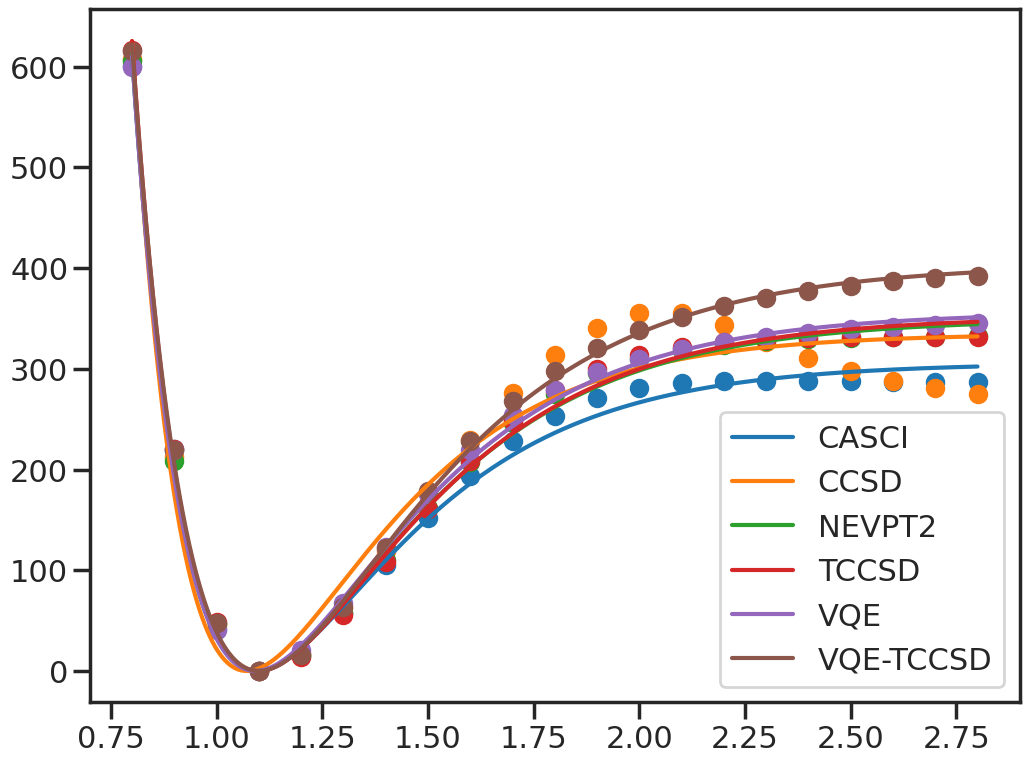

In [10]:
from scipy.optimize import curve_fit

def V_morse(r, De, a, r0):
    return De * (1 - np.exp(-a*(r-r0)))**2

guess = [100, 10, 0.9]

fig, ax = plt.subplots(1, 1, figsize=(12, 9))

xx = np.linspace(0.8, 2.8, 10_000)

for method, dfs in df.groupby("Method"):
    popt, pcov = curve_fit(V_morse, dfs.d, dfs.Energy, p0=guess)
    print(method, popt)
    yy = V_morse(xx, *popt)
    bla = ax.plot(xx, yy, label=method)
    ax.scatter(dfs.d, dfs.Energy)

ax.legend()

In [11]:
print(chan_results)
popt, pcov = curve_fit(V_morse, chan_results[:, 0], chan_results[:, 1], p0=guess)
print(popt)

[[1.12079689 0.        ]
 [1.2700248  0.039942  ]
 [1.4287779  0.118034  ]
 [1.587531   0.19213   ]
 [1.9050372  0.283433  ]
 [2.2225434  0.311389  ]]
[0.33565856 3.16861165 1.13999573]


,d,HF,CCSD,CASCI,NEVPT2,TCCSD,tcc_e_cas_exact,tcc_e_corr_exact,t1diag,s
0,0.8,-108.407359,-108.659855,-108.421541,-108.646396,-108.660927,-0.014183,-0.253568,0.003971,5.231949e+03
1,0.9,-108.782799,-109.054636,-108.801716,-109.044364,-109.056715,-0.018917,-0.273916,0.005565,1.911366e+04
2,1.0,-108.929838,-109.221920,-108.980201,-109.205641,-109.228668,-0.050362,-0.298829,0.007615,4.974432e+04
3,1.1,-108.953796,-109.267389,-109.021905,-109.252508,-109.277084,-0.068109,-0.323288,0.009951,1.021522e+05
4,1.2,-108.914052,-109.250619,-109.004680,-109.237794,-109.263652,-0.090628,-0.349600,0.012471,1.796606e+05
5,1.3,-108.843888,-109.204869,-108.963954,-109.195021,-109.221561,-0.120067,-0.377673,0.015096,2.834596e+05
6,1.4,-108.761718,-109.148383,-108.916561,-109.142718,-109.169116,-0.154843,-0.407398,0.017743,4.119690e+05
7,1.5,-108.677514,-109.090965,-108.869894,-109.090922,-109.116350,-0.192380,-0.438837,0.020334,5.610533e+05
8,1.6,-108.596373,-109.037727,-108.828237,-109.044779,-109.068653,-0.231864,-0.472279,0.022822,7.257704e+05
9,1.7,-108.520608,-108.991365,-108.794017,-109.006677,-109.028832,-0.273409,-0.508224,0.025201,9.030206e+05


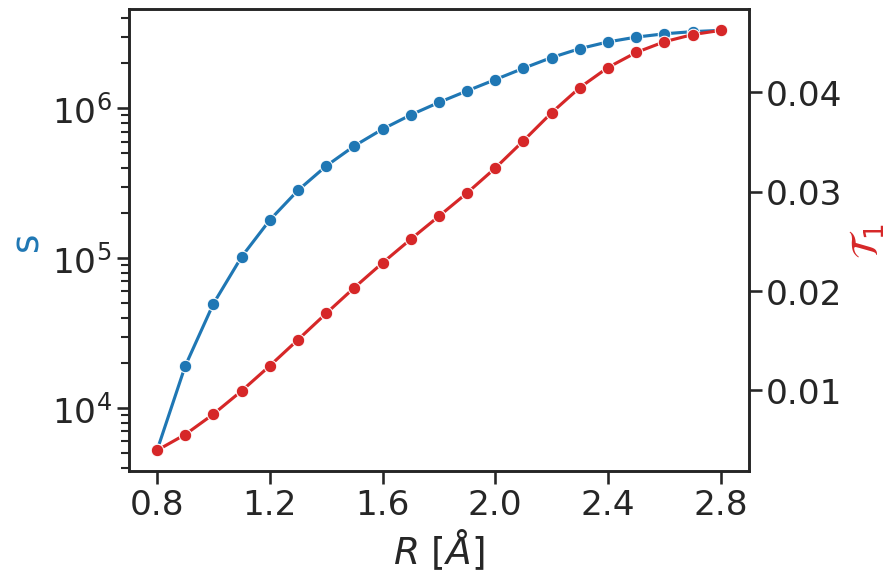

In [39]:
def shot_budget(accuracy, nmo, nact, nalpha, nbeta, aexp, bexp, cexp):
    from tailoredcc.amplitudes import number_overlaps_tccsd
    noverlaps = number_overlaps_tccsd(nact, nalpha, nbeta)
    assert nact == nalpha + nbeta
    bound = np.sqrt(2 * nact)  # sqrt(nqubits) -> sqrt(2*nact)
    nshots = aexp**2 / accuracy**2 * noverlaps**(2*bexp) * nmo**(2*cexp) * np.sqrt(2) * bound
    return nshots


def prefactor_from_t1diag(t1diag):
    return 375.93683021545843*t1diag -0.8353406294341301

test = prefactor_from_t1diag(0.01)
# print(test)
df2['s'] = df2.apply(lambda x: shot_budget(1e-3, nmo=56, nact=6, nalpha=3, nbeta=3, aexp=prefactor_from_t1diag(x.t1diag), bexp=0.277, cexp=-1.074), axis=1)
display(df2)

# print(prefactor_from_t1diag(df2.t1diag))

shots_n2 = np.vstack([df2.d, df2.s.astype(int)]).T
# print(shots_n2)
np.savetxt("shots_n2.txt", shots_n2)

pal = sns.color_palette("tab10")
c1 = pal[0]
c2 = pal[3]

sns.set_theme(context="talk", font_scale=1.5, style="ticks")
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.lineplot(df2, x="d", y="s", ax=ax, marker="o", color=c1)
ax.set_yscale("log")
ax.yaxis.get_label().set_color(c1)
# ax.tick_params(axis='y', colors=c1)
# ax.set_title(rf"$\sum s =$ {df2.s.sum():.1e}")

ax2 = ax.twinx()
sns.lineplot(df2, x="d", y="t1diag", ax=ax2, marker="o", color=c2)
ax2.set_ylabel(r"$\mathcal{T}_1$")
# ax2.set_yscale("log")
ax2.yaxis.get_label().set_color(c2)

ax.set_xlabel(r"$R$ [$\AA$]")

ax.set_xticks(np.arange(0.8, 2.9, 0.4))
# ax.yaxis.grid(True, linestyle="--", linewidth=1, alpha=1)
plt.savefig("shot_budget_n2_dissociation.png")
